## MBC 뉴스 데이터 전처리

In [24]:
# 기초 환경 설정
import os
import re
import numpy as np
import pandas as pd
os.chdir(r"C:\Users\cjy89\NLP\Project_news_crawling\Naver")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'NanumGothic'

In [2]:
# MBC 데이터 불러오기 -> 조회수 별, 댓글 수 별 따로 저장
crawling_list = os.listdir('MBC/')
MBC_ranking_view = pd.DataFrame()
MBC_ranking_comment = pd.DataFrame()

for item in crawling_list:
    df = pd.read_csv("MBC/"+item, sep=",", encoding="utf-8-sig", engine="python")
    MBC_ranking_view = pd.concat([MBC_ranking_view, df.iloc[:20, :]], axis = 0, ignore_index=True)
    MBC_ranking_comment = pd.concat([MBC_ranking_comment, df.iloc[20:, :]], axis=0, ignore_index=True)
    
MBC_ranking_view.drop(["Comment"], axis=1, inplace = True)
MBC_ranking_comment.drop(["View"], axis=1, inplace = True)

In [3]:
# SettingWithCopyWarning 경고 무시
pd.set_option('mode.chained_assignment',  None)

# MBC 뉴스 기사 전처리
title_view = MBC_ranking_view.iloc[:, 4]
title_comment = MBC_ranking_comment.iloc[:, 4]
contents_view = MBC_ranking_view.iloc[:, 6]
contents_comment = MBC_ranking_comment.iloc[:, 5]

titles = [title_view, title_comment]
contents = [contents_view, contents_comment]

for contents_type in contents:
    for i in range(len(contents_type)):
        cleaned_text = contents_type[i][:contents_type[i].find('MBC뉴스')]
        cleaned_text = re.sub('flash 오류를 우회하기 위한 함수 추가 function  flash removeCallback', ' ', cleaned_text)
        cleaned_text = re.sub("동영상 뉴스", ' ', cleaned_text)
        cleaned_text = re.sub("뉴스투데이", ' ', cleaned_text)
        cleaned_text = re.sub("뉴스데스크", ' ', cleaned_text)
        cleaned_text = re.sub("정오뉴스", ' ', cleaned_text)
        cleaned_text = re.sub("앵커", ' ', cleaned_text)
        cleaned_text = re.sub("리포트", ' ', cleaned_text)
        contents_type.iloc[i] = cleaned_text.strip()

## KBS 뉴스 데이터 가져오기

In [119]:
# KBS 데이터 불러오기 -> 조회수 별, 댓글 수 별 따로 저장
crawling_list = os.listdir('KBS/')
KBS_ranking_view = pd.DataFrame()
KBS_ranking_comment = pd.DataFrame()

for item in crawling_list:
    df = pd.read_csv("KBS/"+item, sep=",", encoding="utf-8-sig", engine="python")
    KBS_ranking_view = pd.concat([KBS_ranking_view, df.iloc[:20, :]], axis = 0, ignore_index=True)
    KBS_ranking_comment = pd.concat([KBS_ranking_comment, df.iloc[20:, :]], axis=0, ignore_index=True)
    
KBS_ranking_view.drop(["Comment"], axis=1, inplace = True)
KBS_ranking_comment.drop(["View"], axis=1, inplace = True)

In [158]:
# SettingWithCopyWarning 경고 무시
pd.set_option('mode.chained_assignment',  None)

# KBS 뉴스 기사 전처리
title_view = KBS_ranking_view.iloc[:, 4]
title_comment = KBS_ranking_comment.iloc[:, 4]
contents_view = KBS_ranking_view.iloc[:, 6]
contents_comment = KBS_ranking_comment.iloc[:, 5]

titles = [title_view, title_comment]
contents = [contents_view, contents_comment]

for contents_type in contents:
    for i in range(len(contents_type)):
        cleaned_text = contents_type[i][:contents_type[i].find('kbs.co.kr')]
        cleaned_text = re.sub('flash 오류를 우회하기 위한 함수 추가 function  flash removeCallback', ' ', cleaned_text)
        cleaned_text = re.sub("KBS 뉴스", ' ', cleaned_text)
        cleaned_text = re.sub("영상편집", ' ', cleaned_text)
        cleaned_text = re.sub("앵커", ' ', cleaned_text)
        cleaned_text = re.sub("리포트", ' ', cleaned_text)
        cleaned_text = re.sub("더 빠르고 정확한 소식을 원하시면 KBS뉴스 구독", ' ', cleaned_text)
        contents_type.iloc[i] = cleaned_text.strip()

## MBC 뉴스 조회수 추이 관찰

In [89]:
# 날짜별 조회수 평균 및 표준편차 추이 관찰
view = MBC_ranking_view.iloc[:, 5]

view_info=[]
for i in range(int(len(view)/20)):
    start = i * 20
    end = (i+1) * 20
    daily_view_list = view.iloc[start:end]

    daily_view_info = {}
    daily_view_info["Day"] = 20210101+i
    daily_view_info["Max"] = daily_view_list.iloc[0]
    daily_view_info["Min"] = daily_view_list.iloc[19]
    daily_view_info["Mean"] = daily_view_list.mean()
    daily_view_info["Std"] = daily_view_list.std()
    view_info.append(daily_view_info)
    
view_plot = pd.DataFrame(view_info)
view_plot.set_index('Day', inplace=True)

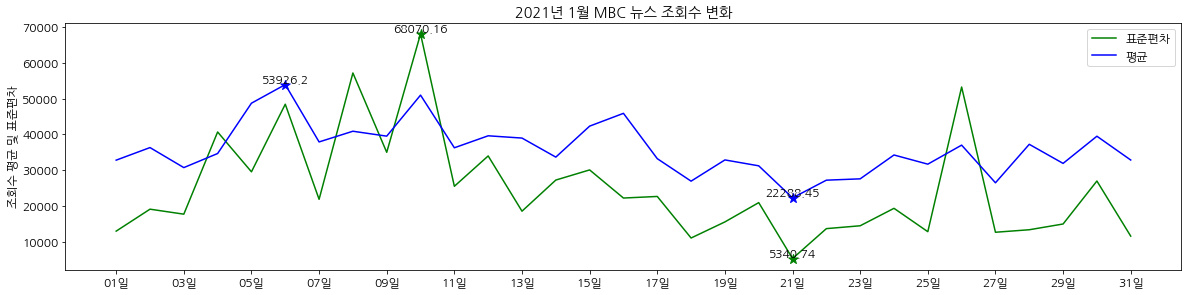

In [159]:
# 그래프 크기 제목 라벨 설정
plt.figure(figsize=(20, 10))

# 1월 MBC 뉴스 조회수 평균과 표준편차 추이
plt.subplot(2, 1, 2)
plt.title("2021년 1월 MBC 뉴스 조회수 변화")
plt.ylabel("조회수 평균 및 표준편차")
plt.xticks(np.arange(view_plot.index[0], view_plot.index[-1] + 1, 2), [str(i)[-2:] + '일' for i in np.arange(view_plot.index[0], view_plot.index[-1] + 1, 2)])

plt.plot(view_plot.index, view_plot["Std"], color="g", label = "표준편차")
plt.plot(view_plot.index, view_plot["Mean"], color="b", label = "평균")
plt.legend()

# 평균과 표준편차 최댓값 최솟값 표시
mean_max_index = view_plot["Mean"].sort_values(ascending=False).index[0]
mean_max = view_plot["Mean"].sort_values(ascending=False).iloc[0]
mean_min_index = view_plot["Mean"].sort_values().index[0]
mean_min = view_plot["Mean"].sort_values().iloc[0]
std_max_index = view_plot["Std"].sort_values(ascending=False).index[0]
std_max = view_plot["Std"].sort_values(ascending=False).iloc[0]
std_min_index = view_plot["Std"].sort_values().index[0]
std_min = view_plot["Std"].sort_values().iloc[0]

plt.scatter(mean_max_index, mean_max, s=100, marker="*", c="b")
plt.scatter(mean_min_index, mean_min, s=100, marker="*", c="b")
plt.text(mean_max_index, mean_max, mean_max, horizontalalignment='center', verticalalignment='bottom')
plt.text(mean_min_index, mean_min, mean_min, horizontalalignment='center', verticalalignment='bottom')

plt.scatter(std_max_index, std_max, s=100, marker="*", c="g")
plt.scatter(std_min_index, std_min, s=100, marker="*", c="g")
plt.text(std_max_index, std_max, round(std_max, 2), horizontalalignment='center', verticalalignment='bottom')
plt.text(std_min_index, std_min, round(std_min, 2), horizontalalignment='center', verticalalignment='bottom')
plt.show()

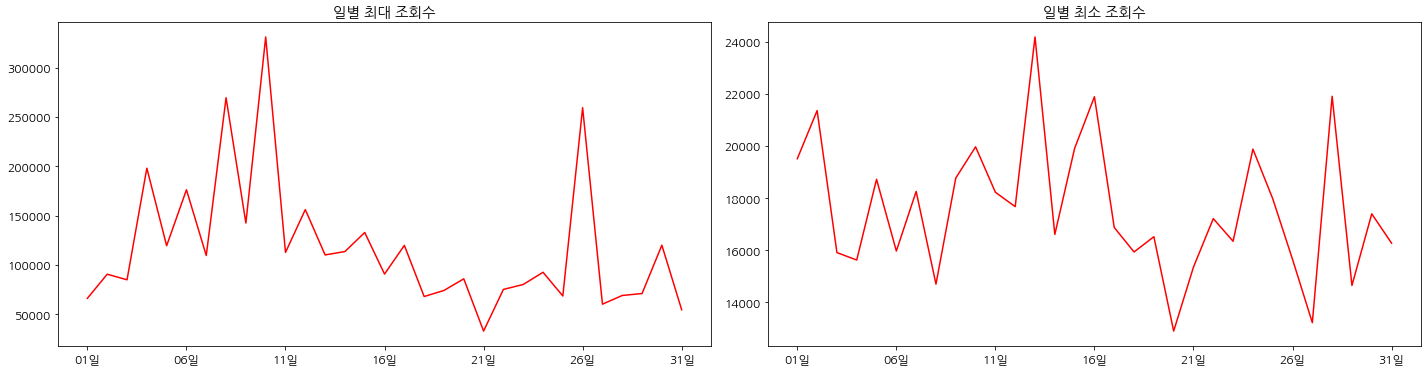

In [164]:
# 일별 최대 최소 조회수 관찰
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("일별 최대 조회수")
plt.xticks(np.arange(view_plot.index[0], view_plot.index[-1] + 1, 5), [str(i)[-2:] + '일' for i in np.arange(view_plot.index[0], view_plot.index[-1] + 1, 5)])
plt.plot(view_plot.index, view_plot["Max"], color="r", label="최댓값")

plt.subplot(2, 2, 2)
plt.title("일별 최소 조회수")
plt.xticks(np.arange(view_plot.index[0], view_plot.index[-1] + 1, 5), [str(i)[-2:] + '일' for i in np.arange(view_plot.index[0], view_plot.index[-1] + 1, 5)])
plt.plot(view_plot.index, view_plot["Min"], color="r", label="최솟값")
plt.tight_layout()
plt.show()

## 제목 데이터 분석

In [ ]:
# 제목으로 사용된 단어 빈도수 분석
from konlpy.tag import Hannanum
from konlpy.utils import pprint
from collections import Counter

total_title=" "
for item in titles[0]:
    total_title += " " + item
        
hannanum = Hannanum()
nouns = hannanum.nouns(total_title)
count = Counter(nouns)

wordInfo = dict()
for tags, counts in count.most_common(50):
    if (len(str(tags)) > 1):
        wordInfo[tags] = counts
        print ("%s : %d" % (tags, counts))